In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


from transformer_IDAO import TransformerIDAO
from clustering.clustering import Clustering2D
from prediction import Model2D
from validation.IDAO_validator_2d_model import IDAO_validator_2d_model
import importlib

%matplotlib inline 

In [2]:
#full_test = pd.read_csv("./data/test.csv", index_col='id')
#full_train = pd.read_csv("./data/train.csv", index_col='id')
full_test = pd.read_csv("./data/test.csv", index_col='id')
full_train = pd.read_csv("./data/train.csv", index_col='id')

transformer = TransformerIDAO()

idao_2d_splitter = IDAO_validator_2d_model(5, 5)

In [3]:
def smape(satellite_predicted_values, satellite_true_values): 
    # the division, addition and subtraction are pointwise 
    return np.mean(np.abs((satellite_predicted_values - satellite_true_values) 
        / (np.abs(satellite_predicted_values) + np.abs(satellite_true_values))))

In [4]:
## список из значений smape (на тесте) для каждого из sat_id
smape_per_sat_id = []
## номер фолда для вывода логов
n_folds = 0

smape_list = []
## пока проверяю предсказания в 2D!s
target_columns = ['x_pred', 'y_pred', 'Vx_pred', 'Vy_pred']#, 'Vz_pred']
true_columns = ['x_transformed', 'y_transformed', 'Vx_transformed', 'Vy_transformed']#, 'Vz']

# for n_clusters in range(1, 200):
for trn_idxs, tst_idxs in idao_2d_splitter.split(full_train[:50000]):
    train_df = None
    test_df = None
    for sat_id in full_train[:50000]['sat_id'].unique():
        if train_df is None:
            train_df = full_train.iloc[trn_idxs[sat_id, 0]:trn_idxs[sat_id, 1]].copy()
        else:
            train_df = pd.concat([train_df, full_train.iloc[trn_idxs[sat_id, 0]:trn_idxs[sat_id, 1]]], axis=0).copy()
        if test_df is None:
            test_df = full_train.iloc[tst_idxs[sat_id, 0]:tst_idxs[sat_id, 1]].copy()
        else:
            test_df = pd.concat([test_df, full_train.iloc[tst_idxs[sat_id, 0]:tst_idxs[sat_id, 1]]], axis=0).copy()

    transformer.fit_transform(train_df, train_coefs_V=None)

    clustering1 = Clustering2D('AgglomerativeClustering', 15)
    clusters_map = clustering1.fit_predict(transformer.train_coefs)

    transformer.fit_transform(test_df, train=False)

    model = Model2D(20)

    test_df, train_df = model.predict(train_df.copy(), test_df.copy(), clusters_map)

    test_df['z_pred'] = 0.0
    test_df['Vz_pred'] = 0.0
    ## так как проверяю предсказания в  2d
#     test_df = transformer.inv_transform(test_df)

    n_folds += 1
#     print(test_df)
    preds = test_df[target_columns].values
    preds1 = test_df[true_columns].values



    print(f'fold: {n_folds}, target_col: {target_columns},\
                  smape: {1 - smape(test_df[target_columns].values, test_df[true_columns].values):.5f}')
    smape_list.append(1 - smape(test_df[target_columns].values, test_df[true_columns].values))

/home/paniquex/Documents/idao_oski/transformer_IDAO.py:35: RuntimeWarning: invalid value encountered in true_divide
  a /= norm
/home/paniquex/Documents/idao_oski/transformer_IDAO.py:36: RuntimeWarning: invalid value encountered in true_divide
  b /= norm
/home/paniquex/Documents/idao_oski/transformer_IDAO.py:37: RuntimeWarning: invalid value encountered in true_divide
  c /= norm


156 0
4 0
2239 1819
2229 1819
5888 5828
5903 5828
6632 6620
6670 6620
7292 7292
7312 7292
10043 9815
10253 9815
16379 16308
16353 16308
17140 17104
17130 17104
18039 17582
17600 17582
22513 22453
22456 22453
23093 23081
23084 23081
26822 26438
26457 26438
30362 30326
30329 30326
30901 30889
30893 30889
33053 32897
33045 32897
34556 34540
34577 34540
40002 39990
40016 39990
40492 40360
40362 40360
41920 41740
41791 41740
44653 44641
44645 44641
45574 45562
45563 45562
46064 45932
45934 45932
47279 47243
47294 47243
47760 47748
47750 47748
48317 48221
48243 48221
49182 49170
49172 49170
50610 50597
50599 50597
51043 50839
51032 50839
52897 52886
52911 52886
53763 53751
53824 53751
54649 54638
54858 54638
56879 56866
56869 56866
57533 57473
57475 57473
58280 58052
58271 58052
60305 60293
60297 60293
62355 62342
62395 62342
62991 62979
62985 62979
67958 67945
68357 67945
72245 72089
72093 72089
73716 73608
73706 73608
74863 74647
74667 74647
76936 76828
77214 76828
80564 80551
80701 80551


/home/paniquex/Documents/idao_oski/transformer_IDAO.py:35: RuntimeWarning: invalid value encountered in true_divide
  a /= norm
/home/paniquex/Documents/idao_oski/transformer_IDAO.py:36: RuntimeWarning: invalid value encountered in true_divide
  b /= norm
/home/paniquex/Documents/idao_oski/transformer_IDAO.py:37: RuntimeWarning: invalid value encountered in true_divide
  c /= norm


180 0
4 0
2648 2182
2638 2182
5888 5828
5951 5828
6632 6620
6694 6620
7316 7296
7770 7296
10530 10521
10740 10521
16451 16308
16472 16308
17140 17104
17179 17104
18120 18098
18571 18098
22561 22453
22456 22453
23598 23307
23780 23307
27231 26775
26792 26775
30435 30326
30329 30326
30901 30889
30893 30889
33197 32897
33213 32897
35600 35124
35447 35124
40002 39990
40016 39990
40637 40360
40362 40360
41944 41870
41887 41870
44653 44641
44645 44641
45636 45562
45585 45562
46185 45932
45934 45932
47328 47243
47344 47243
47760 47748
47750 47748
48317 48221
48243 48221
49182 49170
49172 49170
50644 50597
50619 50597
51211 50839
51104 50839
52898 52886
52888 52886
53763 53751
53753 53751
54649 54638
55098 54638
56878 56866
56869 56866
57581 57473
57475 57473
58328 58052
58368 58052
60305 60293
60297 60293
62351 62342
62443 62342
63519 63506
63513 63506
68343 68337
68771 68337
72390 72089
72093 72089
73812 73608
73730 73608
75103 74647
74667 74647
77152 77131
77599 77131
80564 80551
80701 8055

KeyboardInterrupt: 

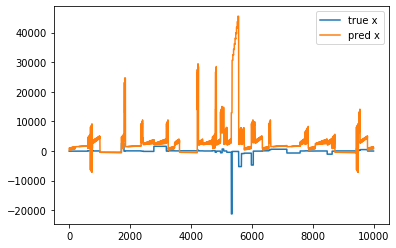

In [11]:
plt.plot(preds1[:, 3], label='true x')
plt.plot(preds[:, 3], label='pred x')
plt.legend()

In [6]:
1 - smape(preds1[1102:1500, 1], preds[1100:1498, 1])

0.8550544918707447

In [22]:
full_train.groupby('sat_id').count()

,epoch,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
sat_id,,,,,,,,,,,,,
0,958,958,958,958,958,958,958,958,958,958,958,958,958
1,2108,2108,2108,2108,2108,2108,2108,2108,2108,2108,2108,2108,2108
2,417,417,417,417,417,417,417,417,417,417,417,417,417
3,354,354,354,354,354,354,354,354,354,354,354,354,354
4,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,499,499,499,499,499,499,499,499,499,499,499,499,499
596,378,378,378,378,378,378,378,378,378,378,378,378,378
597,366,366,366,366,366,366,366,366,366,366,366,366,366


In [20]:
1 - smape(preds1[:, 1], preds[:, 1] * 1.4)

0.5604291194987461

In [5]:
preds.shape

(9999, 4)

In [ ]:
test_df[true_columns]

In [4]:
transformer.fit_transform(full_train)
print(full_train.columns)

/home/paniquex/Documents/idao_oski/transformer_IDAO.py:35: RuntimeWarning: invalid value encountered in true_divide
  a /= norm
/home/paniquex/Documents/idao_oski/transformer_IDAO.py:36: RuntimeWarning: invalid value encountered in true_divide
  b /= norm
/home/paniquex/Documents/idao_oski/transformer_IDAO.py:37: RuntimeWarning: invalid value encountered in true_divide
  c /= norm


Index(['epoch', 'sat_id', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'x_sim', 'y_sim',
       'z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim', 'x_transformed', 'y_transformed',
       'z_transformed', 'Vx_transformed', 'Vy_transformed', 'Vz_transformed'],
      dtype='object')


In [5]:
clustering1 = Clustering2D('AgglomerativeClustering', 300)
clusters_map = clustering1.fit_predict(transformer.train_coefs)

In [6]:
model = Model2D(WIDTH=10)
new_test, new_train = model.predict(full_train.copy(), full_test.copy(), clusters_map)

950 718
725 718
3847 3687
3911 3687
6225 6005
6240 6005
6752 6734
6887 6734
8279 8262
8492 8262
13110 12880
13104 12880
16714 16486
16662 16486
17334 17104
17324 17104
19893 19885
20104 19885
22776 22543
22623 22543
24607 24607
24837 24607
28461 28241
28478 28241
30606 30386
30402 30386
31719 31707
31711 31707
33701 33466
33692 33466
37137 37118
37128 37118
40002 39990
40016 39990
41070 40847
40867 40847
43051 43027
43041 43027
45122 44886
44925 44886
45575 45562
45712 45562
46617 46383
46462 46383
47293 47271
47315 47271
47989 47758
47770 47758
48533 48480
48483 48480
49687 49682
49701 49682
50715 50597
50619 50597
51692 51676
51681 51676
53326 53101
53102 53101
53979 53977
53993 53977
55585 55569
55794 55569
57163 56945
56964 56945
57774 57538
57740 57538
59003 58993
58994 58993
61145 61130
61185 61130
62421 62413
62417 62413
65337 65326
65379 65326
69905 69886
70117 69886
72871 72650
72670 72650
74148 73914
74138 73914
75775 75553
75555 75553
78570 78547
78776 78547
81140 81128
8134

592363 592134
592192 592134
593372 593142
593364 593142
594690 594539
594776 594539
598819 598674
598694 598674
603579 603363
603378 603363
605791 605785
605882 605785
607084 606939
606961 606939
611147 611142
611164 611142
619298 619069
619293 619069
624053 624051
624067 624051
625932 625722
625945 625722
626708 626698
626707 626698
627968 627952
627967 627952
629274 629259
629386 629259
630351 630134
630147 630134
631168 630943
630966 630943
632031 632021
632025 632021
638341 638329
638480 638329
644169 644148
644381 644148
649966 649960
650030 649960
655167 655154
655213 655154
657842 657838
658054 657838
660512 660387
660390 660387
661276 661120
661145 661120
661989 661983
662005 661983
665438 665201
665433 665201
667967 667945
668175 667945
670445 670437
670509 670437
673084 672854
673076 672854
674168 674147
674358 674147
677954 677943
678114 677943
681800 681577
681798 681577
682772 682592
682786 682592
684695 684681
684689 684681
686939 686719
686954 686719
687605 687600
687839

1193537 1193447
1196594 1196423
1196512 1196423
1201894 1201890
1202056 1201890
1209867 1209664
1209887 1209664
1216930 1216925
1217141 1216925
1220098 1220081
1220312 1220081
1221000 1220943
1220990 1220943
1222703 1222529
1222767 1222529
1225000 1224987
1225211 1224987
1227595 1227377
1227395 1227377
1229205 1228969
1229195 1228969
1229859 1229793
1229801 1229793
1230505 1230498
1230737 1230498
1231702 1231473
1231695 1231473
1233857 1233854
1233877 1233854
COORDS HAS ENUMERATED


In [7]:
new_test['z_pred'] = 0.0
new_test['Vz_pred'] = 0.0
new_test = transformer.inv_transform(new_test)

In [8]:
full_test = new_test

In [9]:
# # отрисовка нужного рядя для анализа
# import numpy as np
# import pandas as pd
# import lightgbm as lgbm
# import os
# import matplotlib.pyplot as plt
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# from datetime import datetime
# import time
# from sklearn.linear_model import LinearRegression
# from tqdm import tqdm_notebook as tqdm


# figure = plt.figure(figsize=(10, 5))


# sat_id = 3
# real_col_name = 'x_transformed'
# sim_col_name = real_col_name + '_sim'
# pred_col_name = real_col_name + '_pred'

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=full_test[full_test.sat_id == sat_id].epoch,
#                              y=full_test[full_test.sat_id == sat_id]['x_pred'],
#                              name="Estimated " + real_col_name,
#                              ))

# # fig.add_trace(go.Scatter(x=full_test[full_test.sat_id == sat_id].epoch,
# #                          y=full_test[full_test.sat_id == sat_id][sim_col_name],
# #                          name="Simulation " + real_col_name,
# #                          ))

# # fig.add_trace(go.Scatter(x=full_test[full_test.sat_id == sat_id].epoch,
# #                          y=full_test[full_test.sat_id == sat_id][sim_col_name],
# #                          name="Sim_test " + real_col_name,
# #                          ))
# fig.add_trace(go.Scatter(x=full_train[full_train.sat_id == sat_id].epoch,
#                          y=full_train[full_train.sat_id == sat_id][real_col_name],
#                          name="Real " + real_col_name,
#                          ))

# # fig.add_trace(go.Scatter(x=full_train[full_train.sat_id == sat_id].epoch,
# #                          y=full_train[full_train.sat_id == sat_id][sim_col_name],
# #                          name="Simulation " + real_col_name,
# #                          ))

# fig.update_layout(title_text='Time Series for ' + real_col_name,
#                   xaxis_rangeslider_visible=True,
#                   yaxis_title=real_col_name)
# fig.show()

In [10]:
z_df = pd.read_csv('./submission (1).csv', index_col='id')

In [11]:
z_df['x'] = full_test['x_pred']
z_df['y'] = full_test['y_pred']
z_df['Vx'] = full_test['Vx_pred']
z_df['Vy'] = full_test['Vy_pred']

In [12]:
z_df.to_csv('./submission.csv', index_label='id')